In [44]:
from src import SpotifyService
from src.utils import split_into_batches
from src.data_process import preprocess_data, plot_feature_dists, calc_correlation, plot_correlation
import pandas as pd
import matplotlib.pyplot as plt
import os

In [28]:
service = SpotifyService()

In [29]:
artist = 'JPEGMAFIA'

In [30]:
tracks_s = service.get_songs_from_artist_name(artist)

In [31]:
len(tracks_s)

225

In [32]:
chunks = split_into_batches(tracks_s.values)

In [33]:
audio_feats_df = service.get_audio_feats_full(chunks)

In [34]:
audio_feats_df['popularity'] = audio_feats_df['id'].apply(service.get_popularity_from_track_id)

In [35]:
audio_feats_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity
0,0.808,0.731,2,-5.071,0,0.484,0.5760,0.000000,0.241,0.6030,118.978,audio_features,6m6peFvaRxtVdFNBsyJpVS,spotify:track:6m6peFvaRxtVdFNBsyJpVS,https://api.spotify.com/v1/tracks/6m6peFvaRxtV...,https://api.spotify.com/v1/audio-analysis/6m6p...,249834,4,32
1,0.628,0.783,1,-6.049,1,0.187,0.0319,0.431000,0.145,0.4670,131.456,audio_features,5gCDizE5zy6kaX0JpD28mp,spotify:track:5gCDizE5zy6kaX0JpD28mp,https://api.spotify.com/v1/tracks/5gCDizE5zy6k...,https://api.spotify.com/v1/audio-analysis/5gCD...,184842,4,12
2,0.587,0.543,1,-9.641,1,0.536,0.1500,0.000094,0.379,0.4880,116.609,audio_features,3EMBRAE27agDta0zxgH8p4,spotify:track:3EMBRAE27agDta0zxgH8p4,https://api.spotify.com/v1/tracks/3EMBRAE27agD...,https://api.spotify.com/v1/audio-analysis/3EMB...,195187,4,45
3,0.627,0.962,8,-1.603,1,0.150,0.0835,0.012800,0.434,0.4730,140.997,audio_features,558oD8tdaK2KmUBm7CgINa,spotify:track:558oD8tdaK2KmUBm7CgINa,https://api.spotify.com/v1/tracks/558oD8tdaK2K...,https://api.spotify.com/v1/audio-analysis/558o...,182126,4,47
4,0.710,0.474,1,-7.466,1,0.385,0.7830,0.000048,0.106,0.6550,107.644,audio_features,62ND4fi4W7tj89HpF9iUIy,spotify:track:62ND4fi4W7tj89HpF9iUIy,https://api.spotify.com/v1/tracks/62ND4fi4W7tj...,https://api.spotify.com/v1/audio-analysis/62ND...,161487,4,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,0.552,0.445,7,-12.276,1,0.065,0.6470,0.009020,0.132,0.0396,107.999,audio_features,3lsY2BgwCcorEoJUgcbsFS,spotify:track:3lsY2BgwCcorEoJUgcbsFS,https://api.spotify.com/v1/tracks/3lsY2BgwCcor...,https://api.spotify.com/v1/audio-analysis/3lsY...,269554,4,17
21,0.865,0.843,6,-2.457,1,0.265,0.1740,0.000007,0.729,0.5780,130.065,audio_features,1CdLBa26CSkelZkZHQ7q7t,spotify:track:1CdLBa26CSkelZkZHQ7q7t,https://api.spotify.com/v1/tracks/1CdLBa26CSke...,https://api.spotify.com/v1/audio-analysis/1CdL...,138598,4,30
22,0.783,0.874,11,-1.134,0,0.223,0.1500,0.000002,0.187,0.6710,141.339,audio_features,7J8V76XTLhJXAm8hwCQKXG,spotify:track:7J8V76XTLhJXAm8hwCQKXG,https://api.spotify.com/v1/tracks/7J8V76XTLhJX...,https://api.spotify.com/v1/audio-analysis/7J8V...,224358,4,51
23,0.691,0.803,2,-5.561,1,0.358,0.6640,0.258000,0.683,0.4110,103.162,audio_features,6ehDSiPRftV7vi4ftRfecr,spotify:track:6ehDSiPRftV7vi4ftRfecr,https://api.spotify.com/v1/tracks/6ehDSiPRftV7...,https://api.spotify.com/v1/audio-analysis/6ehD...,270008,4,10


In [47]:
os.makedirs("./data", exist_ok=True)
audio_feats_df.to_csv(f"./data/{artist.lower().replace(' ', '-')}.csv", index=False)

In [37]:
df = pd.read_csv("./data/jpegmafia.csv")

In [38]:
data = preprocess_data(df)
data

,id,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins
0,6m6peFvaRxtVdFNBsyJpVS,32,0.808,0.731,-5.071,0,0.484,0.5760,0.000000,0.241,0.6030,118.978,4.163900
1,5gCDizE5zy6kaX0JpD28mp,12,0.628,0.783,-6.049,1,0.187,0.0319,0.431000,0.145,0.4670,131.456,3.080700
2,3EMBRAE27agDta0zxgH8p4,45,0.587,0.543,-9.641,1,0.536,0.1500,0.000094,0.379,0.4880,116.609,3.253117
3,558oD8tdaK2KmUBm7CgINa,47,0.627,0.962,-1.603,1,0.150,0.0835,0.012800,0.434,0.4730,140.997,3.035433
4,62ND4fi4W7tj89HpF9iUIy,42,0.710,0.474,-7.466,1,0.385,0.7830,0.000048,0.106,0.6550,107.644,2.691450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,3lsY2BgwCcorEoJUgcbsFS,17,0.552,0.445,-12.276,1,0.065,0.6470,0.009020,0.132,0.0396,107.999,4.492567
221,1CdLBa26CSkelZkZHQ7q7t,30,0.865,0.843,-2.457,1,0.265,0.1740,0.000007,0.729,0.5780,130.065,2.309967
222,7J8V76XTLhJXAm8hwCQKXG,51,0.783,0.874,-1.134,0,0.223,0.1500,0.000002,0.187,0.6710,141.339,3.739300
223,6ehDSiPRftV7vi4ftRfecr,10,0.691,0.803,-5.561,1,0.358,0.6640,0.258000,0.683,0.4110,103.162,4.500133


In [39]:
# check dtypes
data.dtypes

id                   object
popularity            int64
danceability        float64
energy              float64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_mins       float64
dtype: object

In [40]:
data.describe()

,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,33.737778,0.626467,0.762049,-4.903222,0.697778,0.252187,0.246973,0.067824,0.351469,0.440884,121.160191,3.050758
std,15.598696,0.150472,0.149294,2.833968,0.460245,0.160528,0.223732,0.202913,0.226874,0.225915,21.380148,1.042939
min,0.000000,0.213000,0.287000,-16.090000,0.000000,0.031800,0.000610,0.000000,0.054900,0.038600,57.257000,0.731067
25%,21.000000,0.524000,0.667000,-6.150000,0.000000,0.117000,0.072200,0.000000,0.151000,0.253000,107.644000,2.393817
50%,38.000000,0.618000,0.771000,-5.100000,1.000000,0.238000,0.174000,0.000002,0.310000,0.407000,121.575000,2.911667
75%,44.000000,0.723000,0.887000,-3.427000,1.000000,0.349000,0.363000,0.000929,0.463000,0.644000,134.648000,3.615217
max,64.000000,0.949000,0.996000,2.383000,1.000000,0.888000,0.930000,0.986000,0.957000,0.888000,183.985000,6.747350


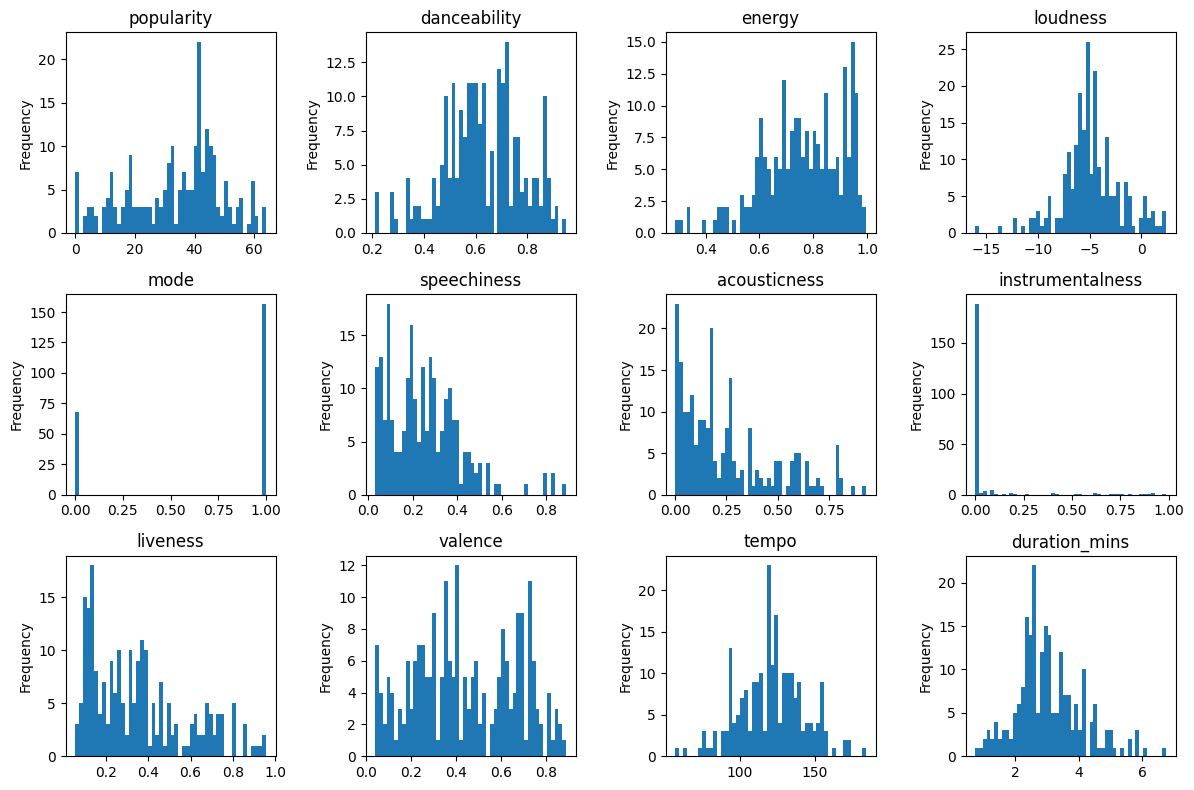

In [41]:
plot_feature_dists(data)
plt.show()

In [42]:
corr = calc_correlation(data)
corr

,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins
popularity,1.000000,-0.194879,0.282953,0.400764,-0.045911,0.116114,-0.049869,-0.354760,-0.052105,0.332365,0.175481,-0.258187
danceability,-0.194879,1.000000,-0.121167,-0.027317,-0.094713,-0.183907,-0.074633,0.038678,0.105724,0.140054,0.002968,0.003156
energy,0.282953,-0.121167,1.000000,0.786741,0.133732,0.353116,-0.346535,-0.253481,0.150903,0.478489,0.235511,-0.222813
loudness,0.400764,-0.027317,0.786741,1.000000,0.022309,0.167417,-0.301436,-0.321369,0.115070,0.539979,0.268116,-0.304744
mode,-0.045911,-0.094713,0.133732,0.022309,1.000000,0.064563,-0.087606,0.037501,0.043673,-0.083347,-0.172900,0.066811
speechiness,0.116114,-0.183907,0.353116,0.167417,0.064563,1.000000,0.004029,-0.236524,0.032291,0.196169,0.158403,0.136335
acousticness,-0.049869,-0.074633,-0.346535,-0.301436,-0.087606,0.004029,1.000000,-0.092100,0.044773,-0.067250,-0.133828,0.151174
instrumentalness,-0.354760,0.038678,-0.253481,-0.321369,0.037501,-0.236524,-0.092100,1.000000,0.033164,-0.283278,-0.056787,0.115662
liveness,-0.052105,0.105724,0.150903,0.115070,0.043673,0.032291,0.044773,0.033164,1.000000,0.182060,-0.076989,0.158150
valence,0.332365,0.140054,0.478489,0.539979,-0.083347,0.196169,-0.067250,-0.283278,0.182060,1.000000,0.136001,-0.348636


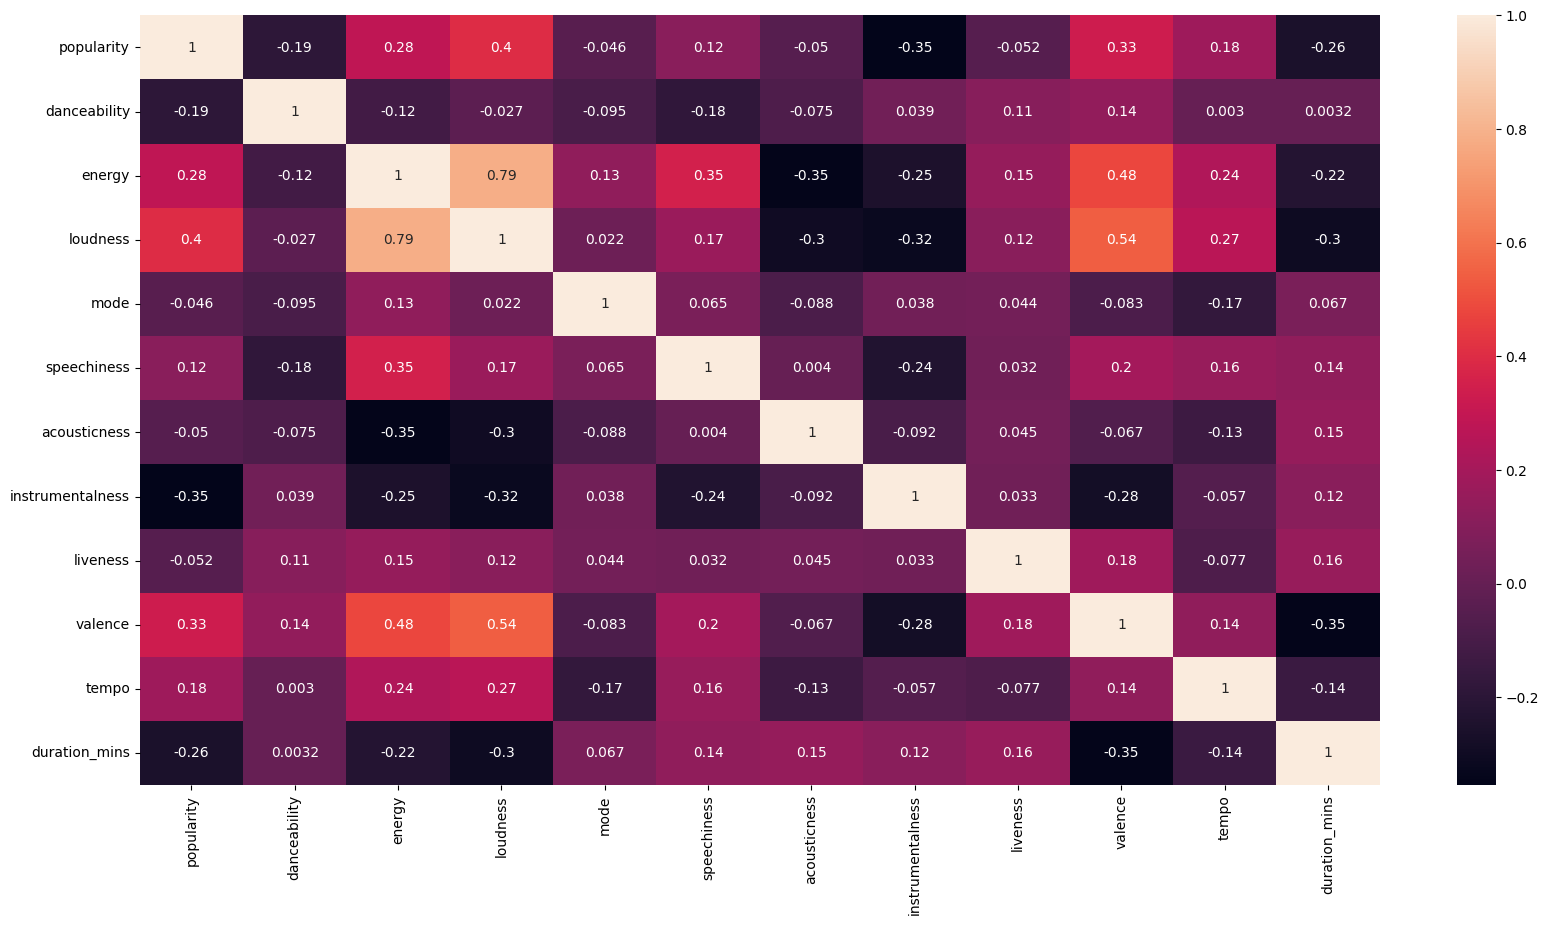

In [43]:
plot_correlation(corr)
plt.show()